In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Import the CSV data
df = pd.read_csv('100_Portfolios_ME_OP_10x10_daily.csv')

In [3]:
# Transform the first column (Date) from YYYYMMDD format to proper datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')


In [4]:
# Set Date as the index for easier time series analysis
df.set_index('Date', inplace=True)

# Display final transformed dataset
df.head()

,SMALL LoOP,ME1 OP2,ME1 OP3,ME1 OP4,ME1 OP5,ME1 OP6,ME1 OP7,ME1 OP8,ME1 OP9,SMALL HiOP,...,BIG LoOP,ME10 OP2,ME10 OP3,ME10 OP4,ME10 OP5,ME10 OP6,ME10 OP7,ME10 OP8,ME10 OP9,BIG HiOP
Date,,,,,,,,,,,,,,,,,,,,,
1963-07-01,-0.99,-0.70,-1.18,-0.67,-0.54,-0.22,-0.83,1.20,-1.02,-0.43,...,-1.03,-0.50,-0.76,-0.34,-0.65,-0.39,-0.80,-0.45,-0.46,-0.31
1963-07-02,0.36,0.27,0.49,0.31,0.67,0.13,0.79,-0.45,-0.10,-0.24,...,0.81,0.87,1.16,0.67,0.59,0.35,0.78,0.96,0.92,0.88
1963-07-03,0.74,0.77,-0.51,0.06,0.16,0.87,0.06,1.04,0.18,0.66,...,-0.26,0.10,0.78,0.89,0.67,0.20,0.53,1.04,0.43,0.24
1963-07-05,0.71,0.19,0.70,0.66,0.05,-0.44,0.58,-0.53,0.08,0.15,...,0.26,0.66,0.33,0.53,0.11,0.16,0.64,0.57,0.31,0.73
1963-07-08,-0.21,-1.40,-0.24,-1.01,-1.33,0.14,-0.79,0.16,-1.59,0.31,...,-0.05,-0.12,-0.67,-0.62,-0.75,0.04,-0.21,-0.68,-0.38,-0.69


In [5]:
df.describe()

,SMALL LoOP,ME1 OP2,ME1 OP3,ME1 OP4,ME1 OP5,ME1 OP6,ME1 OP7,ME1 OP8,ME1 OP9,SMALL HiOP,...,BIG LoOP,ME10 OP2,ME10 OP3,ME10 OP4,ME10 OP5,ME10 OP6,ME10 OP7,ME10 OP8,ME10 OP9,BIG HiOP
count,15603.000000,15603.000000,15603.000000,15603.000000,15603.000000,15603.000000,15603.000000,15603.000000,15603.000000,15603.000000,...,15603.000000,15603.000000,15603.000000,15603.000000,15603.000000,15603.000000,15603.000000,15603.000000,15603.000000,15603.000000
mean,0.117739,0.101952,0.098962,0.096234,0.094631,0.090724,0.097238,0.092162,0.090051,0.081873,...,0.046365,0.036665,0.039621,0.044949,0.046315,0.046465,0.045560,0.053721,0.051543,0.049953
std,1.073407,0.862265,0.860017,0.866193,0.875762,0.912151,1.003820,1.039066,1.177234,1.240463,...,1.979848,1.411670,1.234139,1.234895,1.216936,1.138157,1.109101,1.102407,1.143432,1.081572
min,-11.060000,-9.640000,-11.240000,-11.240000,-12.980000,-11.690000,-14.760000,-13.300000,-13.880000,-15.510000,...,-19.230000,-21.610000,-18.760000,-18.580000,-19.000000,-22.000000,-19.030000,-19.010000,-20.700000,-19.120000
25%,-0.350000,-0.290000,-0.310000,-0.310000,-0.320000,-0.350000,-0.370000,-0.400000,-0.430000,-0.450000,...,-0.820000,-0.570000,-0.550000,-0.520000,-0.500000,-0.470000,-0.480000,-0.470000,-0.480000,-0.480000
50%,0.160000,0.130000,0.120000,0.120000,0.110000,0.100000,0.120000,0.120000,0.110000,0.120000,...,0.010000,0.060000,0.060000,0.050000,0.050000,0.050000,0.050000,0.060000,0.070000,0.060000
75%,0.640000,0.530000,0.530000,0.530000,0.540000,0.540000,0.570000,0.600000,0.630000,0.640000,...,0.890000,0.650000,0.630000,0.615000,0.610000,0.580000,0.580000,0.600000,0.590000,0.590000
max,8.630000,8.890000,9.120000,6.670000,8.520000,11.140000,16.490000,10.800000,20.360000,25.000000,...,33.490000,22.820000,12.120000,17.160000,13.190000,13.980000,11.680000,13.230000,15.060000,13.870000


In [6]:
# check null value
df.isnull().sum()

SMALL LoOP    0
ME1 OP2       0
ME1 OP3       0
ME1 OP4       0
ME1 OP5       0
             ..
ME10 OP6      0
ME10 OP7      0
ME10 OP8      0
ME10 OP9      0
BIG HiOP      0
Length: 100, dtype: int64

There is no null value

### METHODOLOGY

#### 1. Equally-Weighted Method

In [7]:
# Equally weighted portfolio (From 2025-01-02)
df_ew = df.loc['2025-01-02':]

In [8]:
df_ew.head()

,SMALL LoOP,ME1 OP2,ME1 OP3,ME1 OP4,ME1 OP5,ME1 OP6,ME1 OP7,ME1 OP8,ME1 OP9,SMALL HiOP,...,BIG LoOP,ME10 OP2,ME10 OP3,ME10 OP4,ME10 OP5,ME10 OP6,ME10 OP7,ME10 OP8,ME10 OP9,BIG HiOP
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-02,3.50,0.93,-0.40,-0.44,-0.71,-0.47,-0.89,-1.11,0.02,2.90,...,1.51,-0.03,0.55,0.05,0.23,-0.53,-0.30,-0.13,-0.03,-0.35
2025-01-03,4.33,2.27,0.35,2.10,0.44,1.16,1.06,1.23,2.72,1.07,...,3.36,2.48,0.94,1.18,1.79,1.19,1.17,1.41,0.71,0.71
2025-01-06,1.76,0.46,-0.24,-0.24,0.17,-0.71,-1.20,-0.07,4.43,-2.34,...,2.04,1.10,-0.40,-0.03,0.20,-0.74,0.58,0.86,-0.05,-0.31
2025-01-07,-0.44,-0.60,-1.10,-1.37,-0.80,-0.62,-1.22,-1.53,-1.59,-1.58,...,-1.76,-1.19,-0.29,-1.00,-0.46,-0.23,-0.88,-0.83,0.13,-0.33
2025-01-08,-4.97,-1.40,-0.78,-1.30,-0.99,-0.25,-0.87,-1.27,-3.86,-0.74,...,-0.34,-1.13,0.13,0.50,0.65,0.63,0.29,0.19,-0.07,0.61


In [9]:
df_ew['EW daily return'] = df_ew.mean(axis=1)

C:\Users\Lucas\AppData\Local\Temp\ipykernel_29440\278935552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ew['EW daily return'] = df_ew.mean(axis=1)


In [10]:
#innitialize cumulative
cumulative_values = []

# Tính cumulative return cho từng ngày
# cummulative return started with 1 as inital wealth
for i in range(len(df_ew)):
    if i == 0:
        # Ngày đầu tiên: Wealth = 1 * (1 + EW_return/100)
        wealth = 1 * (1 + df_ew['EW daily return'].iloc[i]/100)
        cumulative_values.append(wealth)
    else:
        # Các ngày tiếp theo: Wealth = Cumulative_ngày_trước * (1 + EW_return/100)
        wealth = cumulative_values[i-1] * (1 + df_ew['EW daily return'].iloc[i]/100)
        cumulative_values.append(wealth)

# Thêm cột vào dataframe
df_ew['Cumulative Return'] = cumulative_values

C:\Users\Lucas\AppData\Local\Temp\ipykernel_29440\3374040967.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ew['Cumulative Return'] = cumulative_values


In [11]:
df_ew.head()

,SMALL LoOP,ME1 OP2,ME1 OP3,ME1 OP4,ME1 OP5,ME1 OP6,ME1 OP7,ME1 OP8,ME1 OP9,SMALL HiOP,...,ME10 OP3,ME10 OP4,ME10 OP5,ME10 OP6,ME10 OP7,ME10 OP8,ME10 OP9,BIG HiOP,EW daily return,Cumulative Return
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-02,3.50,0.93,-0.40,-0.44,-0.71,-0.47,-0.89,-1.11,0.02,2.90,...,0.55,0.05,0.23,-0.53,-0.30,-0.13,-0.03,-0.35,-0.0435,0.999565
2025-01-03,4.33,2.27,0.35,2.10,0.44,1.16,1.06,1.23,2.72,1.07,...,0.94,1.18,1.79,1.19,1.17,1.41,0.71,0.71,1.3355,1.012914
2025-01-06,1.76,0.46,-0.24,-0.24,0.17,-0.71,-1.20,-0.07,4.43,-2.34,...,-0.40,-0.03,0.20,-0.74,0.58,0.86,-0.05,-0.31,0.0665,1.013588
2025-01-07,-0.44,-0.60,-1.10,-1.37,-0.80,-0.62,-1.22,-1.53,-1.59,-1.58,...,-0.29,-1.00,-0.46,-0.23,-0.88,-0.83,0.13,-0.33,-0.6904,1.006590
2025-01-08,-4.97,-1.40,-0.78,-1.30,-0.99,-0.25,-0.87,-1.27,-3.86,-0.74,...,0.13,0.50,0.65,0.63,0.29,0.19,-0.07,0.61,-0.2663,1.003909


In [12]:
df_ew['EW daily return'].describe()

count    122.000000
mean       0.026881
std        1.636432
min       -6.585300
25%       -0.651225
50%       -0.050950
75%        0.871150
max        9.062400
Name: EW daily return, dtype: float64

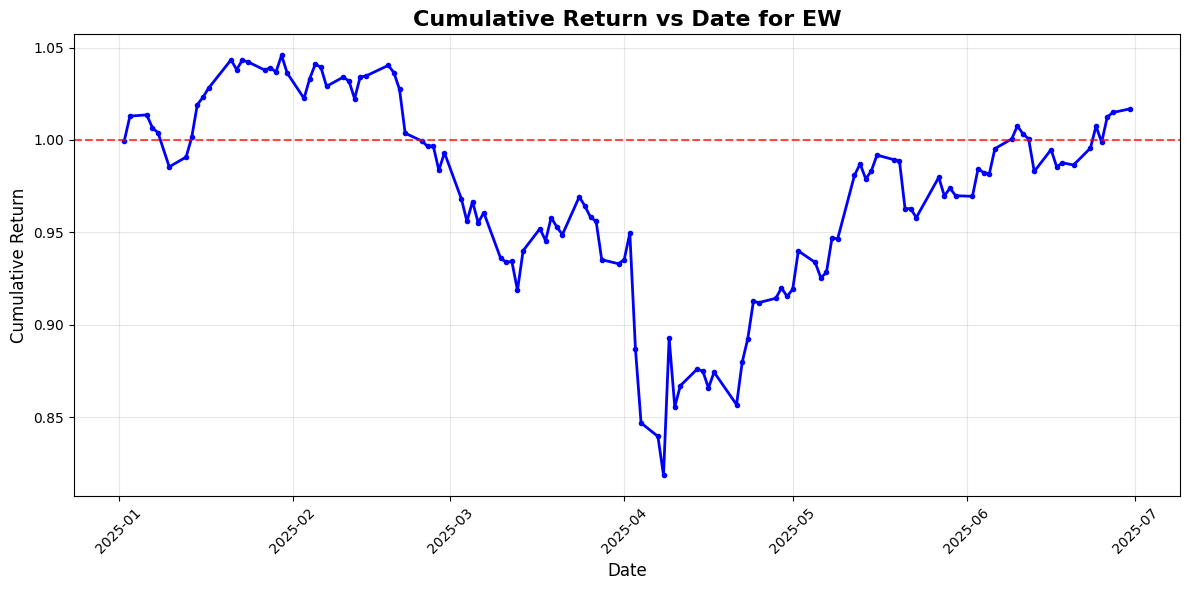

In [13]:
# Vẽ biểu đồ line plot
plt.figure(figsize=(12, 6))
plt.plot(df_ew.index, df_ew['Cumulative Return'], linewidth=2, color='blue', marker='o', markersize=3)

# Thiết lập tiêu đề và nhãn
plt.title('Cumulative Return vs Date for EW', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return', fontsize=12)

# Thêm grid
plt.grid(True, alpha=0.3)

# Định dạng trục x
plt.xticks(rotation=45)

# Thêm đường ngang tại y=1 để tham chiếu
plt.axhline(y=1.0, color='red', linestyle='--', alpha=0.7)

# Tối ưu hóa layout
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

In [14]:
# Calculate mean, std, and Sharpe ratio
mean_return = df_ew['EW daily return'].mean()
std_return = df_ew['EW daily return'].std()
sharpe_ratio = mean_return / std_return

print(f"Mean return: {mean_return:.6f}")
print(f"Standard deviation: {std_return:.6f}")
print(f"Sharpe ratio: {sharpe_ratio:.6f}")

Mean return: 0.026881
Standard deviation: 1.636432
Sharpe ratio: 0.016427


#### 2. Minimum-Variance Method

In [15]:
# Minimum-Variance portfolio (window size = 126, take from 2024-03-07 only)
df_mv = df.loc['2024-07-03':]

In [16]:
df_mv.head()


,SMALL LoOP,ME1 OP2,ME1 OP3,ME1 OP4,ME1 OP5,ME1 OP6,ME1 OP7,ME1 OP8,ME1 OP9,SMALL HiOP,...,BIG LoOP,ME10 OP2,ME10 OP3,ME10 OP4,ME10 OP5,ME10 OP6,ME10 OP7,ME10 OP8,ME10 OP9,BIG HiOP
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-03,0.78,-0.12,0.04,0.26,-0.28,0.11,0.00,0.61,-0.17,-0.21,...,0.55,0.65,0.27,-0.34,0.94,-0.33,0.16,0.08,0.16,0.32
2024-07-05,0.00,-0.78,-1.19,-1.30,-1.38,-2.03,-1.19,-1.00,-1.44,-1.73,...,0.65,1.53,0.12,0.22,0.20,0.18,-0.11,0.90,0.05,0.35
2024-07-08,1.10,0.23,0.87,0.98,0.98,0.68,0.85,0.29,1.76,0.75,...,0.26,1.28,0.00,-0.31,0.15,-0.17,-0.13,-0.03,-0.23,0.21
2024-07-09,1.14,-0.45,-0.99,-1.04,-0.40,0.38,-0.76,-0.82,-1.94,-0.83,...,-1.24,-0.06,-0.03,0.05,0.60,0.25,0.11,-0.15,-0.50,-0.15
2024-07-10,1.28,0.67,0.51,0.47,2.33,1.06,1.53,0.07,0.76,0.60,...,-2.96,1.88,0.95,1.10,0.71,0.74,0.75,0.80,0.82,0.69


In [17]:
df_mv.shape

(248, 100)

In [18]:
df_mv['EW daily return'] = df_mv.mean(axis=1)

C:\Users\Lucas\AppData\Local\Temp\ipykernel_29440\2747586874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mv['EW daily return'] = df_mv.mean(axis=1)


In [19]:
df_mv.head()

,SMALL LoOP,ME1 OP2,ME1 OP3,ME1 OP4,ME1 OP5,ME1 OP6,ME1 OP7,ME1 OP8,ME1 OP9,SMALL HiOP,...,ME10 OP2,ME10 OP3,ME10 OP4,ME10 OP5,ME10 OP6,ME10 OP7,ME10 OP8,ME10 OP9,BIG HiOP,EW daily return
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-03,0.78,-0.12,0.04,0.26,-0.28,0.11,0.00,0.61,-0.17,-0.21,...,0.65,0.27,-0.34,0.94,-0.33,0.16,0.08,0.16,0.32,0.1508
2024-07-05,0.00,-0.78,-1.19,-1.30,-1.38,-2.03,-1.19,-1.00,-1.44,-1.73,...,1.53,0.12,0.22,0.20,0.18,-0.11,0.90,0.05,0.35,-0.5887
2024-07-08,1.10,0.23,0.87,0.98,0.98,0.68,0.85,0.29,1.76,0.75,...,1.28,0.00,-0.31,0.15,-0.17,-0.13,-0.03,-0.23,0.21,0.4702
2024-07-09,1.14,-0.45,-0.99,-1.04,-0.40,0.38,-0.76,-0.82,-1.94,-0.83,...,-0.06,-0.03,0.05,0.60,0.25,0.11,-0.15,-0.50,-0.15,-0.4931
2024-07-10,1.28,0.67,0.51,0.47,2.33,1.06,1.53,0.07,0.76,0.60,...,1.88,0.95,1.10,0.71,0.74,0.75,0.80,0.82,0.69,0.8963


In [20]:
# 1. Chuẩn bị dữ liệu
R = df_mv.iloc[:,:-1].values  # Return data (bỏ 1 cột cuối)
n, p = R.shape  # n = số ngày, p = số assets

In [21]:
# 2. Tạo target y = R * w_EW
w_EW = np.ones(p) / p  # Equally weighted
y = R @ w_EW  # Matrix multiplication

# 3. Tạo features X = R * N
I_p_minus_1 = np.eye(p-1)  # Identity matrix
ones_p_minus_1 = np.ones((p-1, 1))  # Vector of ones
N = np.vstack([I_p_minus_1, -ones_p_minus_1.T])  # Partitioned matrix
X = R @ N  # Matrix multiplication


In [22]:
# Thiết lập các biến
window_size = 126  # Kích thước cửa sổ
predictions = []  # Lưu predictions
portfolio_weights = []  # Lưu portfolio weights
dates = []  # Lưu ngày prediction
betas = [] 
train_errors = []   # RMSE theo cửa sổ
train_r2 = []       # R² theo cửa sổ
sample_fits = {}    # Lưu 1 số lần fit để vẽ

In [23]:
print(f"Total days: {n}, Assets: {p}")
print(f"Window size: {window_size}")
print(f"Number of predictions: {n - window_size}")

Total days: 248, Assets: 100
Window size: 126
Number of predictions: 122


In [24]:
check_every = 30   # Kiểm tra mỗi 50 bước

for i in range(window_size, n):
    # 1. Training data
    R_train = R[i-window_size:i]
    y_train = R_train @ w_EW
    X_train = R_train @ N
    
    # 2. Train model
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train, y_train)
    
    beta = model.coef_
    w_minvar = w_EW - (N @ beta)
    
    # 3. Predict next day
    X_next = R[i:i+1] @ N
    y_pred = model.predict(X_next)[0]
    
    # 4. Lưu kết quả
    predictions.append(y_pred)
    portfolio_weights.append(w_minvar)
    betas.append(beta)
    dates.append(df_mv.index[i])
    
    # 5. Train error
    y_train_pred = model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2 = r2_score(y_train, y_train_pred)
    train_errors.append(rmse)
    train_r2.append(r2)
    
    # 6. Lưu 1 số lần fit để visualize
    if (i - window_size + 1) % check_every == 0:
        sample_fits[df_mv.index[i]] = (y_train, y_train_pred)

print(f"\n✓ Completed sliding window training!")
print(f"Total predictions: {len(predictions)}")
print(f"Date range: {dates[0].strftime('%Y-%m-%d')} to {dates[-1].strftime('%Y-%m-%d')}")



✓ Completed sliding window training!
Total predictions: 122
Date range: 2025-01-02 to 2025-06-30


Check for overfitting

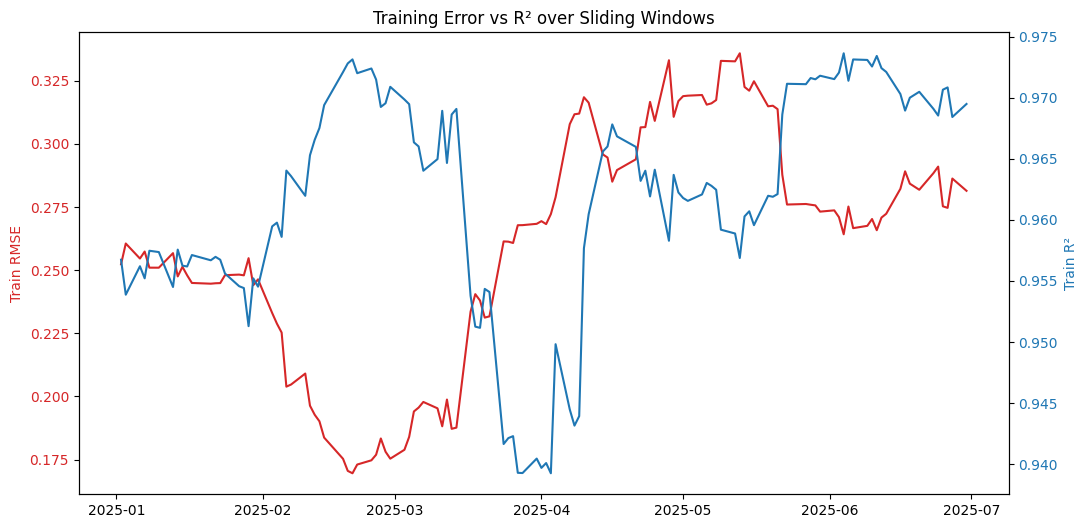

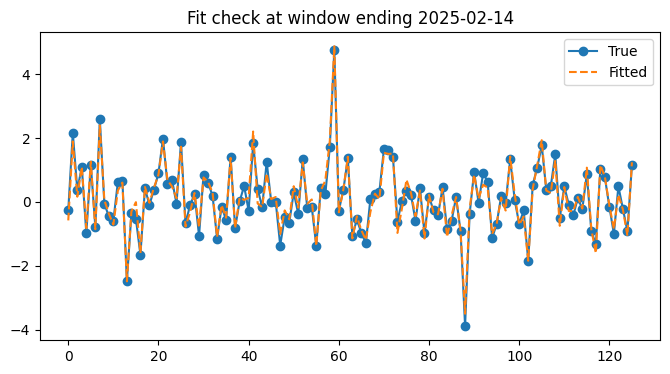

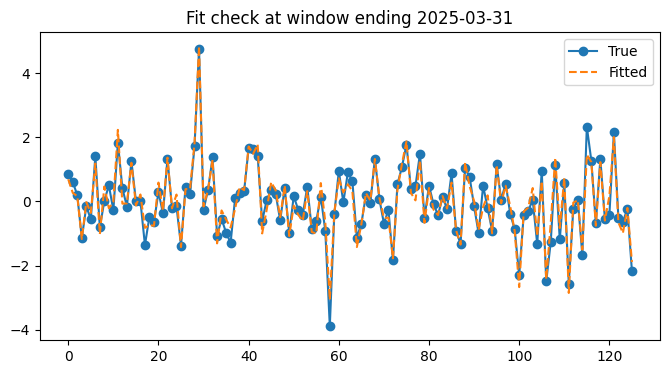

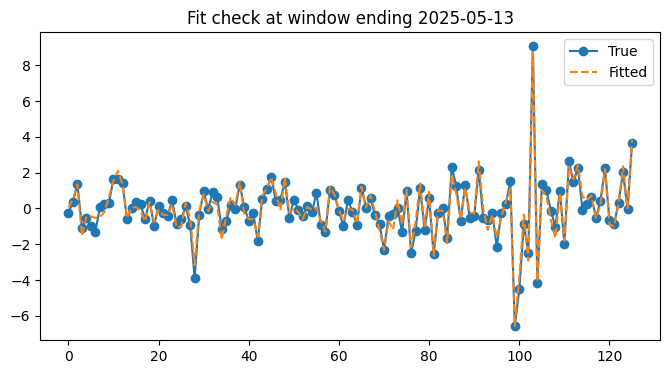

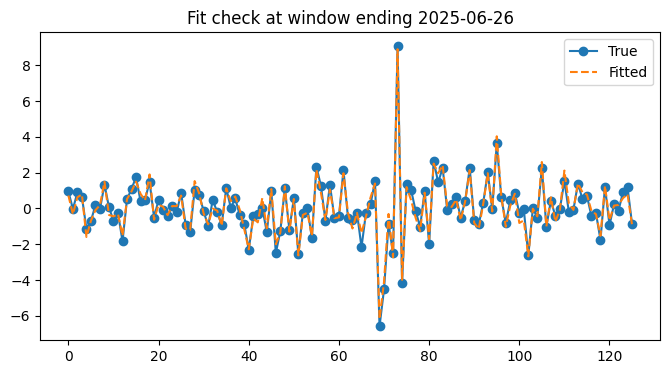

In [25]:
# 1. Plot RMSE and R² by time
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(dates, train_errors, label="Train RMSE", color="tab:red")
ax1.set_ylabel("Train RMSE", color="tab:red")
ax1.tick_params(axis="y", labelcolor="tab:red")

ax2 = ax1.twinx()
ax2.plot(dates, train_r2, label="Train R²", color="tab:blue")
ax2.set_ylabel("Train R²", color="tab:blue")
ax2.tick_params(axis="y", labelcolor="tab:blue")

plt.title("Training Error vs R² over Sliding Windows")
plt.show()

# 2. fitting lines for some samples (we have 122 predictions)
for date, (y_true, y_pred) in sample_fits.items():
    plt.figure(figsize=(8,4))
    plt.plot(y_true, label="True", marker="o")
    plt.plot(y_pred, label="Fitted", linestyle="--")
    plt.title(f"Fit check at window ending {date.strftime('%Y-%m-%d')}")
    plt.legend()
    plt.show()

Easily notice the Overfitting issue of MinVar method. R2 is high for every slide window

Calculate the Cummulative return of MV

In [26]:
# Lấy dữ liệu từ 2025-01-02 trở đi
df_2025 = df_mv['2025-01-02':]

# Lấy return data (bỏ cột đầu và cuối)
R_2025 = df_2025.iloc[:, :-1].values  # 

# Chuyển portfolio_weights thành array
weights_array = np.array(portfolio_weights)  

# Sử dụng np.multiply to calcualte return for each asset per day
result_matrix = np.multiply(R_2025, weights_array)

print(f"result_matrix shape: {result_matrix.shape}")
result_matrix

result_matrix shape: (122, 100)


array([[ 0.34450077, -0.04199581, -0.04602635, ..., -0.02001535,
        -0.0201039 ,  0.04000622],
       [ 0.21426175,  0.1545468 ,  0.01318036, ..., -0.00497271,
         0.50471573,  0.01489566],
       [ 0.03298721,  0.05312181, -0.00233939, ...,  0.07209322,
        -0.03225949,  0.04340262],
       ...,
       [ 0.12832888,  0.19167147,  0.27214642, ...,  0.12914506,
         0.33986663, -0.12484047],
       [-0.16303327,  0.02873939,  0.1833718 , ...,  0.19981219,
         0.16662716, -0.04580167],
       [ 0.09135394,  0.15527752,  0.09870361, ...,  0.31023228,
         0.05242795,  0.07650136]], shape=(122, 100))

In [27]:
# Lấy tên cột assets từ df_mv gốc (bỏ cột cuối)
column_names = df_mv.iloc[:, :-1].columns.tolist()

# Tạo DataFrame
df_mv = pd.DataFrame(result_matrix, index=dates, columns=column_names)

In [28]:
df_mv.head()

,SMALL LoOP,ME1 OP2,ME1 OP3,ME1 OP4,ME1 OP5,ME1 OP6,ME1 OP7,ME1 OP8,ME1 OP9,SMALL HiOP,...,BIG LoOP,ME10 OP2,ME10 OP3,ME10 OP4,ME10 OP5,ME10 OP6,ME10 OP7,ME10 OP8,ME10 OP9,BIG HiOP
2025-01-02,0.344501,-0.041996,-0.046026,0.037123,-0.092496,0.019080,0.009095,-0.064416,-0.000671,0.390555,...,-0.000826,0.002114,-0.017041,0.011052,-0.081861,-0.393834,-0.027868,-0.020015,-0.020104,0.040006
2025-01-03,0.214262,0.154547,0.013180,-0.129255,0.093912,-0.017030,0.075535,0.048676,-0.121154,0.152454,...,0.007581,-0.143009,0.167395,0.254034,-0.651757,0.855500,0.078262,-0.004973,0.504716,0.014896
2025-01-06,0.032987,0.053122,-0.002339,-0.000436,0.014931,0.070007,-0.082314,-0.000212,-0.267180,-0.385076,...,-0.002080,-0.065075,-0.045115,-0.009324,-0.058454,-0.451121,0.063070,0.072093,-0.032259,0.043403
2025-01-07,-0.007433,-0.070987,-0.073922,0.054278,-0.048272,0.122039,-0.093699,-0.035709,0.071811,-0.235123,...,-0.002552,0.085924,-0.032910,-0.298890,0.139318,-0.130169,-0.131350,-0.103325,0.093005,0.061676
2025-01-08,-0.367336,-0.104922,0.005751,0.138720,-0.143763,0.029973,-0.049255,-0.047388,0.100448,-0.124369,...,-0.003275,0.060451,0.006149,0.145854,-0.189391,0.400088,0.064319,0.007107,-0.040538,-0.018893


In [29]:
# Tạo cột MV return bằng cách tính tổng từng hàng
df_mv['MV daily return'] = df_mv.sum(axis=1)

In [30]:
df_mv.head()

,SMALL LoOP,ME1 OP2,ME1 OP3,ME1 OP4,ME1 OP5,ME1 OP6,ME1 OP7,ME1 OP8,ME1 OP9,SMALL HiOP,...,ME10 OP2,ME10 OP3,ME10 OP4,ME10 OP5,ME10 OP6,ME10 OP7,ME10 OP8,ME10 OP9,BIG HiOP,MV daily return
2025-01-02,0.344501,-0.041996,-0.046026,0.037123,-0.092496,0.019080,0.009095,-0.064416,-0.000671,0.390555,...,0.002114,-0.017041,0.011052,-0.081861,-0.393834,-0.027868,-0.020015,-0.020104,0.040006,-1.668738
2025-01-03,0.214262,0.154547,0.013180,-0.129255,0.093912,-0.017030,0.075535,0.048676,-0.121154,0.152454,...,-0.143009,0.167395,0.254034,-0.651757,0.855500,0.078262,-0.004973,0.504716,0.014896,-0.770835
2025-01-06,0.032987,0.053122,-0.002339,-0.000436,0.014931,0.070007,-0.082314,-0.000212,-0.267180,-0.385076,...,-0.065075,-0.045115,-0.009324,-0.058454,-0.451121,0.063070,0.072093,-0.032259,0.043403,-1.509211
2025-01-07,-0.007433,-0.070987,-0.073922,0.054278,-0.048272,0.122039,-0.093699,-0.035709,0.071811,-0.235123,...,0.085924,-0.032910,-0.298890,0.139318,-0.130169,-0.131350,-0.103325,0.093005,0.061676,0.245016
2025-01-08,-0.367336,-0.104922,0.005751,0.138720,-0.143763,0.029973,-0.049255,-0.047388,0.100448,-0.124369,...,0.060451,0.006149,0.145854,-0.189391,0.400088,0.064319,0.007107,-0.040538,-0.018893,-0.364475


In [31]:
# Khởi tạo list để lưu giá trị cumulative
cumulative_values = []

# Tính cumulative return cho từng ngày
# cummulative return started with 1 as inital wealth
for i in range(len(df_mv)):
    if i == 0:
        # Ngày đầu tiên: Wealth = 1 * (1 + EW_return/100)
        wealth = 1 * (1 + df_mv['MV daily return'].iloc[i]/100)
        cumulative_values.append(wealth)
    else:
        # Các ngày tiếp theo: Wealth = Cumulative_ngày_trước * (1 + EW_return/100)
        wealth = cumulative_values[i-1] * (1 + df_mv['MV daily return'].iloc[i]/100)
        cumulative_values.append(wealth)

# Thêm cột vào dataframe
df_mv['Cumulative Return'] = cumulative_values

In [32]:
df_mv.head()

,SMALL LoOP,ME1 OP2,ME1 OP3,ME1 OP4,ME1 OP5,ME1 OP6,ME1 OP7,ME1 OP8,ME1 OP9,SMALL HiOP,...,ME10 OP3,ME10 OP4,ME10 OP5,ME10 OP6,ME10 OP7,ME10 OP8,ME10 OP9,BIG HiOP,MV daily return,Cumulative Return
2025-01-02,0.344501,-0.041996,-0.046026,0.037123,-0.092496,0.019080,0.009095,-0.064416,-0.000671,0.390555,...,-0.017041,0.011052,-0.081861,-0.393834,-0.027868,-0.020015,-0.020104,0.040006,-1.668738,0.983313
2025-01-03,0.214262,0.154547,0.013180,-0.129255,0.093912,-0.017030,0.075535,0.048676,-0.121154,0.152454,...,0.167395,0.254034,-0.651757,0.855500,0.078262,-0.004973,0.504716,0.014896,-0.770835,0.975733
2025-01-06,0.032987,0.053122,-0.002339,-0.000436,0.014931,0.070007,-0.082314,-0.000212,-0.267180,-0.385076,...,-0.045115,-0.009324,-0.058454,-0.451121,0.063070,0.072093,-0.032259,0.043403,-1.509211,0.961007
2025-01-07,-0.007433,-0.070987,-0.073922,0.054278,-0.048272,0.122039,-0.093699,-0.035709,0.071811,-0.235123,...,-0.032910,-0.298890,0.139318,-0.130169,-0.131350,-0.103325,0.093005,0.061676,0.245016,0.963362
2025-01-08,-0.367336,-0.104922,0.005751,0.138720,-0.143763,0.029973,-0.049255,-0.047388,0.100448,-0.124369,...,0.006149,0.145854,-0.189391,0.400088,0.064319,0.007107,-0.040538,-0.018893,-0.364475,0.959850


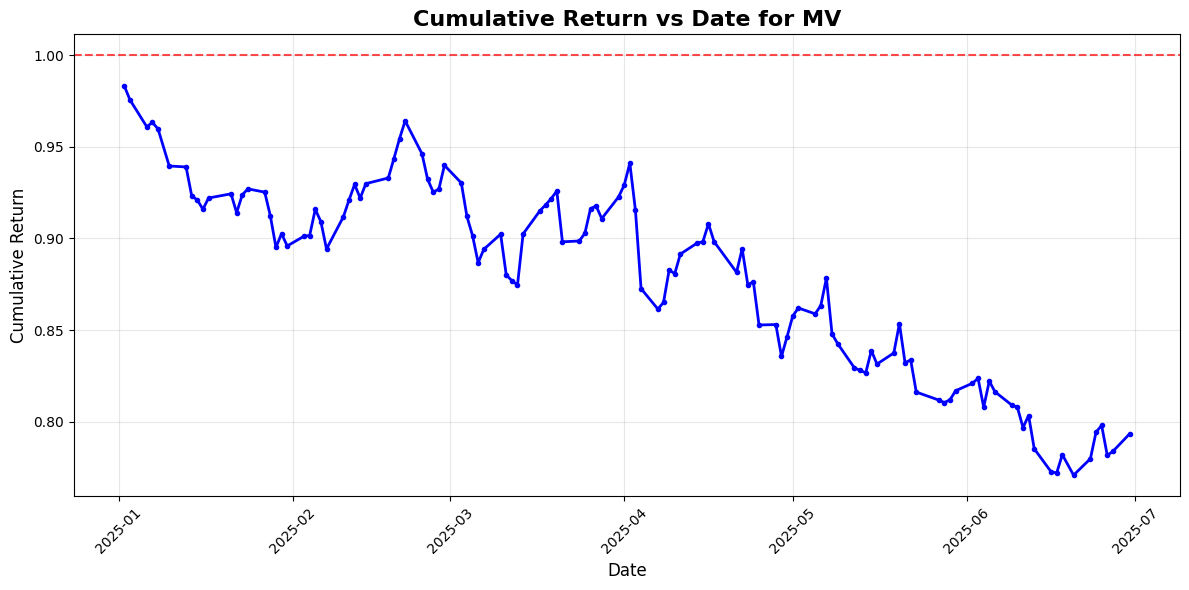

In [33]:
# Vẽ biểu đồ line plot
plt.figure(figsize=(12, 6))
plt.plot(df_mv.index, df_mv['Cumulative Return'], linewidth=2, color='blue', marker='o', markersize=3)

# Thiết lập tiêu đề và nhãn
plt.title('Cumulative Return vs Date for MV', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return', fontsize=12)

# Thêm grid
plt.grid(True, alpha=0.3)

# Định dạng trục x
plt.xticks(rotation=45)

# Thêm đường ngang tại y=1 để tham chiếu
plt.axhline(y=1.0, color='red', linestyle='--', alpha=0.7)

# Tối ưu hóa layout
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

In [34]:
# Calculate mean, std, and Sharpe ratio
mean_return = df_mv['MV daily return'].mean()
std_return = df_mv['MV daily return'].std()
sharpe_ratio = mean_return / std_return

print(f"Mean return: {mean_return:.6f}")
print(f"Standard deviation: {std_return:.6f}")
print(f"Sharpe ratio: {sharpe_ratio:.6f}")

Mean return: -0.180231
Standard deviation: 1.363850
Sharpe ratio: -0.132148


#### 3. Ridge and LASSO

In [35]:
# Minimum-Variance portfolio (window size = 126, take from 2024-03-07 only)
df_lari = df.loc['2024-07-03':]

In [36]:
df_lari.head()

,SMALL LoOP,ME1 OP2,ME1 OP3,ME1 OP4,ME1 OP5,ME1 OP6,ME1 OP7,ME1 OP8,ME1 OP9,SMALL HiOP,...,BIG LoOP,ME10 OP2,ME10 OP3,ME10 OP4,ME10 OP5,ME10 OP6,ME10 OP7,ME10 OP8,ME10 OP9,BIG HiOP
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-03,0.78,-0.12,0.04,0.26,-0.28,0.11,0.00,0.61,-0.17,-0.21,...,0.55,0.65,0.27,-0.34,0.94,-0.33,0.16,0.08,0.16,0.32
2024-07-05,0.00,-0.78,-1.19,-1.30,-1.38,-2.03,-1.19,-1.00,-1.44,-1.73,...,0.65,1.53,0.12,0.22,0.20,0.18,-0.11,0.90,0.05,0.35
2024-07-08,1.10,0.23,0.87,0.98,0.98,0.68,0.85,0.29,1.76,0.75,...,0.26,1.28,0.00,-0.31,0.15,-0.17,-0.13,-0.03,-0.23,0.21
2024-07-09,1.14,-0.45,-0.99,-1.04,-0.40,0.38,-0.76,-0.82,-1.94,-0.83,...,-1.24,-0.06,-0.03,0.05,0.60,0.25,0.11,-0.15,-0.50,-0.15
2024-07-10,1.28,0.67,0.51,0.47,2.33,1.06,1.53,0.07,0.76,0.60,...,-2.96,1.88,0.95,1.10,0.71,0.74,0.75,0.80,0.82,0.69


c:\Users\Lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.034e+00, tolerance: 3.108e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.028e+00, tolerance: 3.108e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

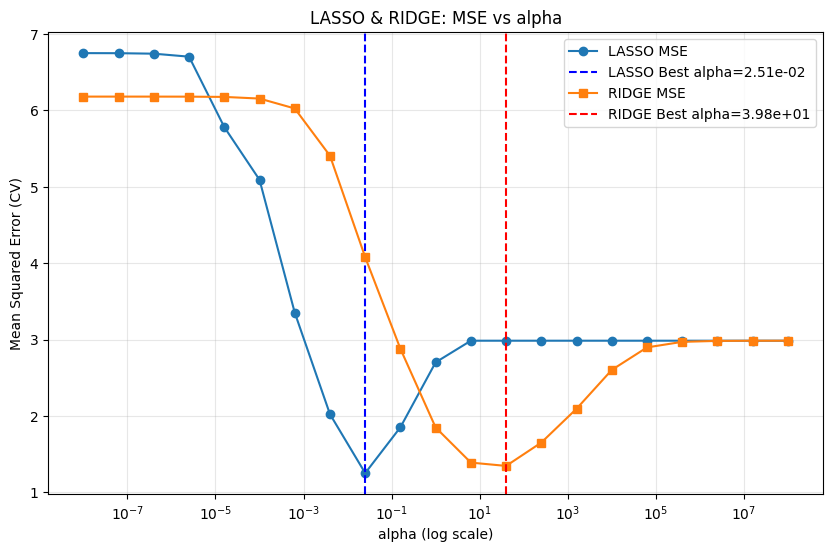

Best alpha for LASSO: 0.025118864315095822
Best CV score (MSE) for LASSO: 1.2528872798768254
Best alpha for RIDGE: 39.810717055349855
Best CV score (MSE) for RIDGE: 1.3471828862432271


In [37]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

# Grid alpha
alphas = np.logspace(-8, 8, 21)

CV_SPLITS = 5
_ts = lambda n: TimeSeriesSplit(n_splits=min(CV_SPLITS, max(2, n // 10)))

# ---------------------
# LASSO
# ---------------------
lasso = Lasso(fit_intercept=True, max_iter=10000)
param_grid = {'alpha': alphas}
grid_lasso = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=_ts(len(y_train)))
grid_lasso.fit(X_train, y_train)
mean_mse_lasso = -grid_lasso.cv_results_['mean_test_score']
best_alpha_lasso = grid_lasso.best_params_['alpha']

# ---------------------
# RIDGE
# ---------------------
ridge = Ridge(fit_intercept=True, max_iter=10000)
param_grid = {'alpha': alphas}
grid_ridge = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=_ts(len(y_train)))
grid_ridge.fit(X_train, y_train)
mean_mse_ridge = -grid_ridge.cv_results_['mean_test_score']
best_alpha_ridge = grid_ridge.best_params_['alpha']

# ---------------------
# Vẽ biểu đồ kết hợp
# ---------------------
plt.figure(figsize=(10,6))
plt.semilogx(alphas, mean_mse_lasso, marker='o', label='LASSO MSE')
plt.axvline(best_alpha_lasso, color='blue', linestyle='--', label=f"LASSO Best alpha={best_alpha_lasso:.2e}")

plt.semilogx(alphas, mean_mse_ridge, marker='s', label='RIDGE MSE')
plt.axvline(best_alpha_ridge, color='red', linestyle='--', label=f"RIDGE Best alpha={best_alpha_ridge:.2e}")

plt.xlabel("alpha (log scale)")
plt.ylabel("Mean Squared Error (CV)")
plt.title("LASSO & RIDGE: MSE vs alpha")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# ---------------------
# In kết quả tốt nhất
# ---------------------
print("Best alpha for LASSO:", best_alpha_lasso)
print("Best CV score (MSE) for LASSO:", -grid_lasso.best_score_)
print("Best alpha for RIDGE:", best_alpha_ridge)
print("Best CV score (MSE) for RIDGE:", -grid_ridge.best_score_)


In [38]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score


def sliding_window_training_full(R, w_EW, N, df_index, window_size=126, model_type="lasso", n_alphas=101):
    """
    Sliding window training for Lasso or Ridge with train metrics.
    
    Returns:
        predictions, portfolio_weights, dates, train_rmse, train_r2, alphas_best
    """
    n, p = R.shape
    predictions = []
    portfolio_weights = []
    dates = []
    train_rmse = []
    train_r2 = []
    alphas_best = []

    # Convert to numpy array if necessary
    R = R.values if hasattr(R, "values") else R
    N = N.values if hasattr(N, "values") else N
    w_EW = w_EW.values.ravel() if hasattr(w_EW, "values") else w_EW.ravel()

    # Grid alpha
    alphas = np.logspace(-8, 8, n_alphas)

    for i in range(window_size, n):
        # 1. Training data
        R_train = R[i - window_size:i]
        y_train = (R_train @ w_EW).ravel()
        X_train = R_train @ N
        if X_train.ndim == 1:
            X_train = X_train.reshape(-1, 1)

        # 2. Chọn model
        if model_type == "lasso":
            model = LassoCV(alphas=alphas, cv=_ts(len(y_train)), fit_intercept=True, max_iter=10000)
        elif model_type == "ridge":
            model = RidgeCV(alphas=alphas, cv=_ts(len(y_train)))
        else:
            raise ValueError("model_type must be 'lasso' or 'ridge'")

        # 3. Fit model
        model.fit(X_train, y_train)

        # 4. Lấy beta và alpha tốt nhất
        beta = model.coef_
        try:
            alpha_best = model.alpha_  # LassoCV
        except AttributeError:
            alpha_best = model.alpha_ if hasattr(model, "alpha_") else model.alpha  # RidgeCV
        alphas_best.append(alpha_best)

        # 5. Trọng số minvar
        w_minvar = w_EW - (N @ beta)

        # 6. Dự báo ngày tiếp theo
        R_next = R[i:i+1]
        X_next = R_next @ N
        if X_next.ndim == 1:
            X_next = X_next.reshape(1, -1)
        y_pred = model.predict(X_next)[0]

        # 7. Lưu kết quả
        predictions.append(y_pred)
        portfolio_weights.append(w_minvar)
        dates.append(df_index[i])

        # 8. Tính RMSE & R² trên tập train
        y_train_pred = model.predict(X_train)
        rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        train_rmse.append(rmse)
        train_r2.append(r2_score(y_train, y_train_pred))

        # Progress
        if (i - window_size + 1) % 50 == 0:
            print(f"Completed {i - window_size + 1}/{n - window_size} predictions")

    print(f"\n✓ Completed sliding window training with {model_type.upper()}!")
    print(f"Total predictions: {len(predictions)}")
    print(f"Date range: {dates[0]} to {dates[-1]}")

    return predictions, portfolio_weights, dates, train_rmse, train_r2, alphas_best


In [39]:
# LASSO
pred_lasso, w_lasso, dates_lasso, rmse_lasso, r2_lasso, alpha_lasso = sliding_window_training_full(
    R, w_EW, N, df_lari.index, window_size=126, model_type="lasso", n_alphas=21
)

# RIDGE
pred_ridge, w_ridge, dates_ridge, rmse_ridge, r2_ridge, alpha_ridge = sliding_window_training_full(
    R, w_EW, N, df_lari.index, window_size=126, model_type="ridge", n_alphas=21
)


c:\Users\Lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.655e-02, tolerance: 1.201e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.715e-01, tolerance: 1.599e-02
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check th

Completed 50/122 predictions


c:\Users\Lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.171e-02, tolerance: 9.705e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.345e-02, tolerance: 9.628e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

Completed 100/122 predictions


c:\Users\Lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.740e-02, tolerance: 9.603e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.884e-02, tolerance: 2.959e-02
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check th


✓ Completed sliding window training with LASSO!
Total predictions: 122
Date range: 2025-01-02 00:00:00 to 2025-06-30 00:00:00
Completed 50/122 predictions
Completed 100/122 predictions

✓ Completed sliding window training with RIDGE!
Total predictions: 122
Date range: 2025-01-02 00:00:00 to 2025-06-30 00:00:00


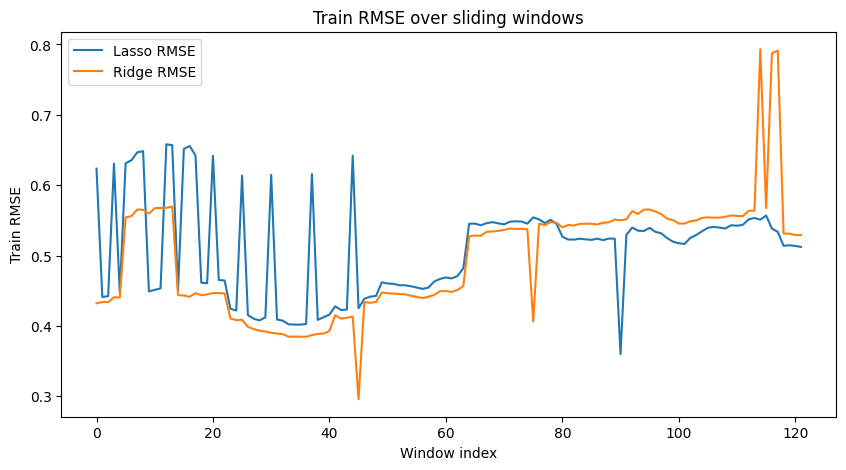

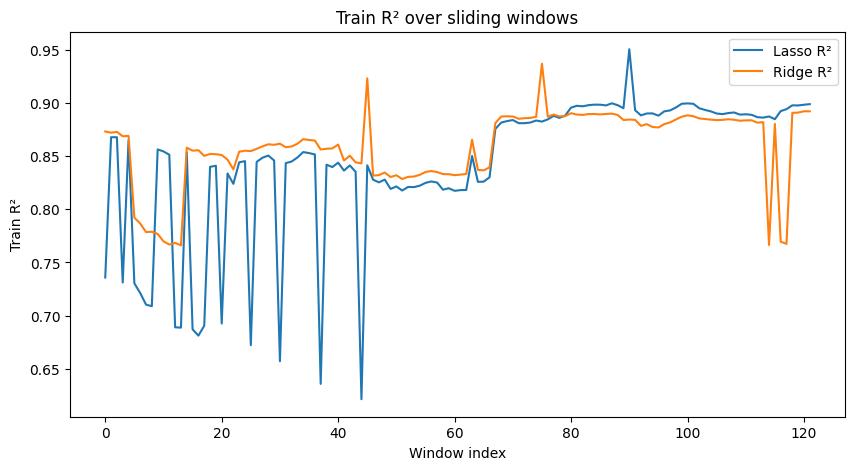

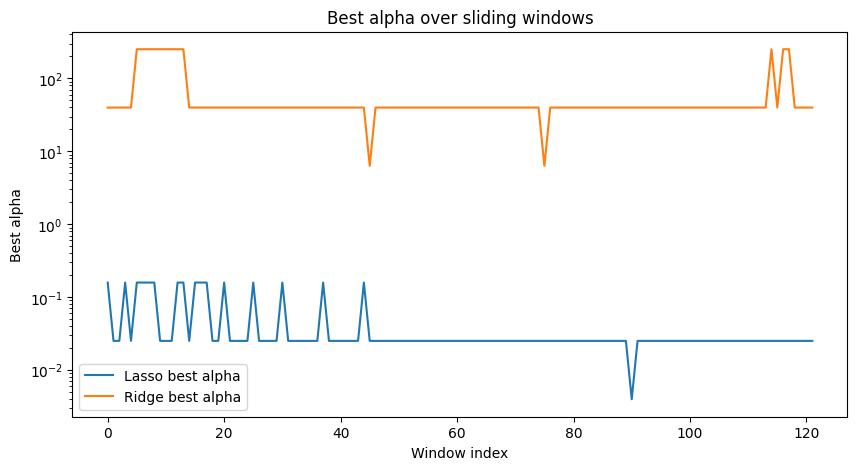

In [40]:
# RMSE
plt.figure(figsize=(10,5))
plt.plot(rmse_lasso, label="Lasso RMSE")
plt.plot(rmse_ridge, label="Ridge RMSE")
plt.xlabel("Window index")
plt.ylabel("Train RMSE")
plt.title("Train RMSE over sliding windows")
plt.legend()
plt.show()

# R²
plt.figure(figsize=(10,5))
plt.plot(r2_lasso, label="Lasso R²")
plt.plot(r2_ridge, label="Ridge R²")
plt.xlabel("Window index")
plt.ylabel("Train R²")
plt.title("Train R² over sliding windows")
plt.legend()
plt.show()

# Alpha tốt nhất
plt.figure(figsize=(10,5))
plt.plot(alpha_lasso, label="Lasso best alpha")
plt.plot(alpha_ridge, label="Ridge best alpha")
plt.yscale("log")
plt.xlabel("Window index")
plt.ylabel("Best alpha")
plt.title("Best alpha over sliding windows")
plt.legend()
plt.show()


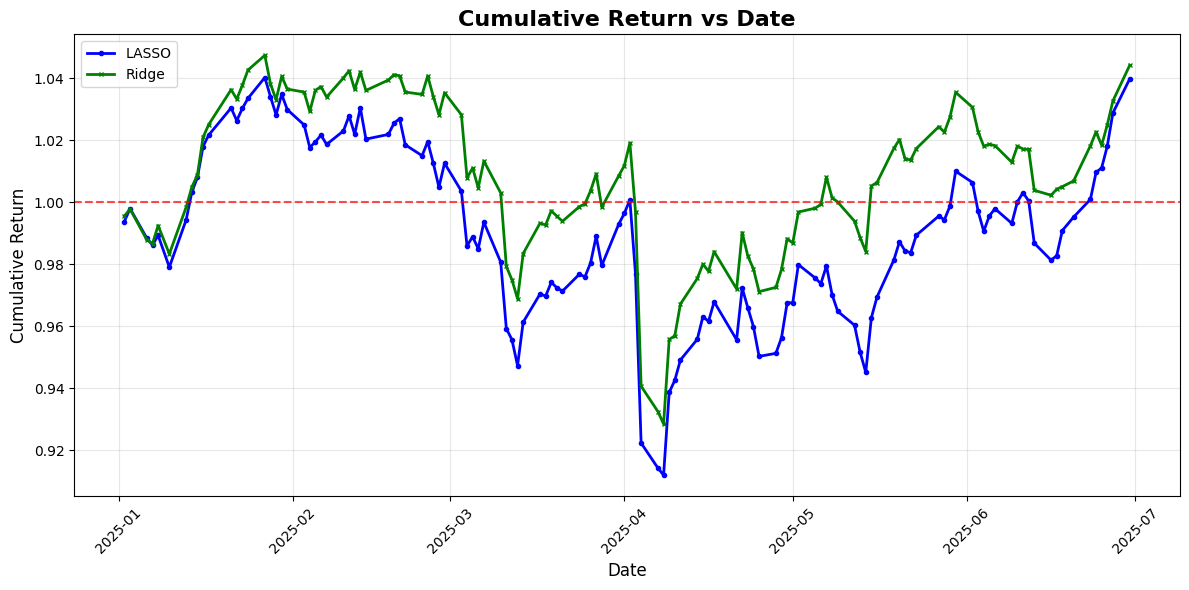

In [57]:
def calculate_cumulative_return(R, weights, dates, strategy_name="Strategy"):
    """
    Tính cumulative return dựa trên daily returns và weights.
    Trả về DataFrame có cột return hàng ngày và cumulative return.
    """
    # Đảm bảo weights là array
    weights_array = np.array(weights)
    
    # Tính daily portfolio return
    result_matrix = np.multiply(R, weights_array)
    df_result = pd.DataFrame(result_matrix, index=dates, columns=df_mv.columns[:-1])
    df_result[f'{strategy_name}_Return'] = df_result.sum(axis=1)
    
    # Tính cumulative return
    df_result[f'{strategy_name}_Cumulative'] = (1 + df_result[f'{strategy_name}_Return']/100).cumprod()
    
    return df_result[[f'{strategy_name}_Return', f'{strategy_name}_Cumulative']]

# Lấy dữ liệu từ 2025-01-02 trở đi
df_2025 = df_lari['2025-01-02':]
R_2025 = df_2025
dates = df_2025.index

# Tính cho LASSO
df_lasso = calculate_cumulative_return(R_2025, w_lasso, dates, strategy_name="Lasso")

# Tính cho Ridge
df_ridge = calculate_cumulative_return(R_2025, w_ridge, dates, strategy_name="Ridge")

# Vẽ biểu đồ cumulative return
plt.figure(figsize=(12, 6))
plt.plot(dates, df_lasso['Lasso_Cumulative'], label='LASSO', linewidth=2, color='blue', marker='o', markersize=3)
plt.plot(dates, df_ridge['Ridge_Cumulative'], label='Ridge', linewidth=2, color='green', marker='x', markersize=3)

plt.title('Cumulative Return vs Date', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return', fontsize=12)
plt.grid(True, alpha=0.3)
plt.axhline(y=1.0, color='red', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [42]:
def calculate_metrics(df, strategy_name):
    """
    Tính mean, std và Sharpe ratio cho daily return.
    """
    daily_return = df[f"{strategy_name}_Return"]

    mean_ret = daily_return.mean()
    std_ret = daily_return.std()
    sharpe_ratio = mean_ret / std_ret if std_ret != 0 else np.nan

    return {
        "Strategy": strategy_name,
        "Mean": mean_ret,
        "Std": std_ret,
        "Sharpe Ratio": sharpe_ratio
    }

# Tính metrics cho Lasso và Ridge
metrics_lasso = calculate_metrics(df_lasso, "Lasso")
metrics_ridge = calculate_metrics(df_ridge, "Ridge")

# Gom vào DataFrame cho dễ so sánh
df_metrics = pd.DataFrame([metrics_lasso, metrics_ridge])
print(df_metrics)


  Strategy      Mean       Std  Sharpe Ratio
0    Lasso  0.036706  0.975246      0.037638
1    Ridge  0.039920  0.949149      0.042059


SUMMARIZE

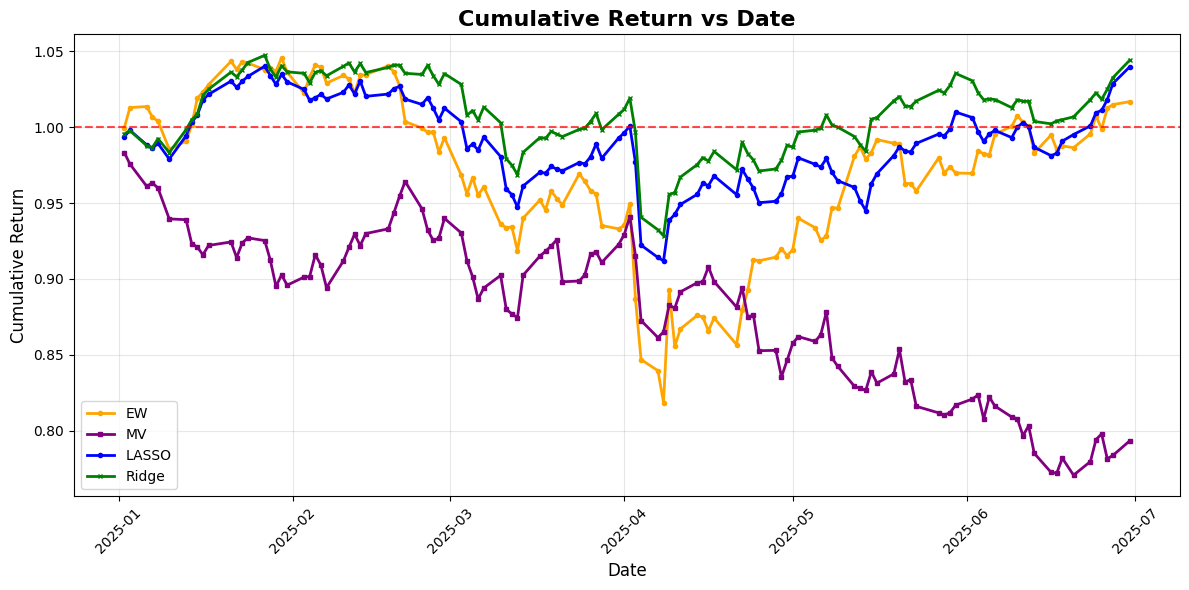

In [50]:
# Lấy dữ liệu từ 2025-01-02 trở đi
df_2025 = df_lari['2025-01-02':]
R_2025 = df_2025
dates = df_2025.index

# Tính cumulative return cho MV, LASSO, Ridge
cumulative_returns = {
    "EW": df_ew['Cumulative Return'],  # EW đã có sẵn
    "MV": df_mv['Cumulative Return'], # MV từ daily return
    "LASSO": df_lasso['Lasso_Cumulative'],
    "Ridge": df_ridge['Ridge_Cumulative']
}

# Vẽ biểu đồ cumulative return
plt.figure(figsize=(12, 6))
colors = {"EW": "orange", "MV": "purple", "LASSO": "blue", "Ridge": "green"}
markers = {"EW": "o", "MV": "s", "LASSO": "o", "Ridge": "x"}

for name in cumulative_returns:
    plt.plot(dates, cumulative_returns[name], label=name, linewidth=2, 
             color=colors[name], marker=markers[name], markersize=3)

plt.title('Cumulative Return vs Date', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return', fontsize=12)
plt.grid(True, alpha=0.3)
plt.axhline(y=1.0, color='red', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [51]:
# Giả sử df_ew, df_result (MV), df_lasso, df_ridge đã có cột daily return tương ứng

daily_returns = {
    "EW": df_ew['EW daily return'],  # chuyển từ cumulative return sang daily return %
    "MV": df_mv['MV daily return'],       # nếu bạn đã có cột daily return MV
    "LASSO": df_lasso['Lasso_Return'],  # daily return LASSO
    "Ridge": df_ridge['Ridge_Return']   # daily return Ridge
}

sharpe_ratios = {}
for name, returns in daily_returns.items():
    sharpe_ratios[name] = returns.mean() / returns.std()

# In kết quả
for name, sr in sharpe_ratios.items():
    print(f"{name} Sharpe Ratio: {sr:.4f}")


EW Sharpe Ratio: 0.0164
MV Sharpe Ratio: -0.1321
LASSO Sharpe Ratio: 0.0376
Ridge Sharpe Ratio: 0.0421


#### 4. Elastic Net

In [71]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import TimeSeriesSplit

def _ts(n_splits):
    return TimeSeriesSplit(n_splits=min(5, n_splits))

def sliding_window_training(R, w_EW, N, df_index, window_size=126, model_type="lasso", n_alphas=101, l1_ratio=0.5):
    """
    Sliding window training cho LASSO, Ridge, ElasticNet
    R: daily returns (n_days x n_assets)
    w_EW: equal-weight portfolio (n_assets,)
    N: transformation matrix (p x (p-1))
    df_index: list of dates
    model_type: "lasso", "ridge", "elasticnet"
    l1_ratio: chỉ dùng cho elasticnet (0=L2, 1=L1)
    """
    n, p = R.shape
    predictions = []
    portfolio_weights = []
    dates = []

    alphas = np.logspace(-8, 8, n_alphas)

    for i in range(window_size, n):
        train_start = i - window_size
        train_end = i
        R_train = R[train_start:train_end]
        y_train = R_train @ w_EW
        X_train = R_train @ N
        if X_train.ndim == 1:
            X_train = X_train.reshape(-1, 1)

        # --- chọn model ---
        if model_type == "lasso":
            model = LassoCV(alphas=alphas, cv=_ts(len(y_train)), fit_intercept=True, max_iter=10000)
        elif model_type == "ridge":
            model = RidgeCV(alphas=alphas, cv=_ts(len(y_train)))
        elif model_type == "elasticnet":
            model = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratio, cv=_ts(len(y_train)), fit_intercept=True, max_iter=10000)
        else:
            raise ValueError("model_type phải là 'lasso', 'ridge' hoặc 'elasticnet'")

        # Fit model
        model.fit(X_train, y_train)

        # Lấy beta
        beta = model.coef_

        # Trọng số minvar
        w_minvar = w_EW - (N @ beta)

        # Dự báo ngày tiếp theo
        R_next = R[i:i+1]
        X_next = R_next @ N
        if X_next.ndim == 1:
            X_next = X_next.reshape(1, -1)
        y_pred = model.predict(X_next)[0]

        # Lưu kết quả
        predictions.append(y_pred)
        portfolio_weights.append(w_minvar)
        dates.append(df_index[i])

        # Progress
        if (i - window_size + 1) % 50 == 0:
            print(f"Completed {i - window_size + 1}/{n - window_size} predictions")

    print(f"\n✓ Completed sliding window training with {model_type.upper()}!")
    print(f"Total predictions: {len(predictions)}")
    print(f"Date range: {dates[0]} to {dates[-1]}")

    return predictions, portfolio_weights, dates

In [72]:
pred_elastic, w_elastic, dates_elastic = sliding_window_training(
    R=R,
    w_EW=w_EW,
    N=N,
    df_index=df_lari.index,
    window_size=126,
    model_type="elasticnet",
    n_alphas=21,
    l1_ratio=0.5
)


c:\Users\Lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.053e-02, tolerance: 1.599e-02
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.312e-01, tolerance: 1.599e-02
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, che

Completed 50/122 predictions


c:\Users\Lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.254e-02, tolerance: 9.705e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.002e-02, tolerance: 9.705e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

Completed 100/122 predictions


c:\Users\Lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.021e-02, tolerance: 2.902e-02
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.027e-02, tolerance: 2.902e-02
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, che


✓ Completed sliding window training with ELASTICNET!
Total predictions: 122
Date range: 2025-01-02 00:00:00 to 2025-06-30 00:00:00


c:\Users\Lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.423e-01, tolerance: 3.108e-02
  model = cd_fast.enet_coordinate_descent_gram(


In [73]:
df_elastic = calculate_cumulative_return(R_2025, w_elastic, dates, strategy_name="Elastic")

In [74]:
df_elastic

,Elastic_Return,Elastic_Cumulative
Date,,
2025-01-02,-0.658224,0.993418
2025-01-03,0.161930,0.995026
2025-01-06,-0.905970,0.986012
2025-01-07,-0.177393,0.984263
2025-01-08,0.746150,0.991607
...,...,...
2025-06-24,0.935785,1.043846
2025-06-25,0.271636,1.046681
2025-06-26,0.449158,1.051382


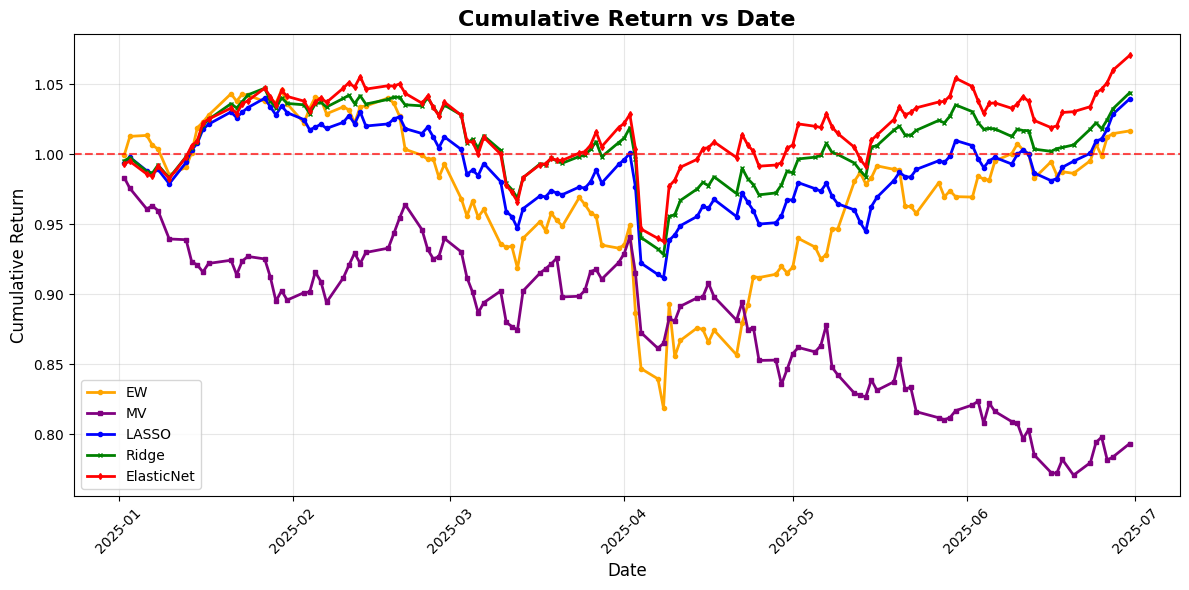

In [75]:
# Tính cumulative return cho MV, LASSO, Ridge, ElasticNet

cumulative_returns = {
    "EW": df_ew['Cumulative Return'],  # EW đã có sẵn
    "MV": df_mv['Cumulative Return'], # MV từ daily return
    "LASSO": df_lasso['Lasso_Cumulative'],
    "Ridge": df_ridge['Ridge_Cumulative'],
    "ElasticNet":  df_elastic['Elastic_Cumulative']# thêm ElasticNet
}

# Vẽ biểu đồ cumulative return
plt.figure(figsize=(12, 6))
colors = {"EW": "orange", "MV": "purple", "LASSO": "blue", "Ridge": "green", "ElasticNet": "red"}
markers = {"EW": "o", "MV": "s", "LASSO": "o", "Ridge": "x", "ElasticNet": "d"}

for name in cumulative_returns:
    plt.plot(dates, cumulative_returns[name], label=name, linewidth=2, 
             color=colors[name], marker=markers[name], markersize=3)

plt.title('Cumulative Return vs Date', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return', fontsize=12)
plt.grid(True, alpha=0.3)
plt.axhline(y=1.0, color='red', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [76]:
# Giả sử df_ew, df_result (MV), df_lasso, df_ridge đã có cột daily return tương ứng
# df_elastic là dataframe tương tự với cột 'ElasticNet_Return'

daily_returns = {
    "EW": df_ew['EW daily return'],  # chuyển từ cumulative return sang daily return %
    "MV": df_mv['MV daily return'],       # daily return MV
    "LASSO": df_lasso['Lasso_Return'],  # daily return LASSO
    "Ridge": df_ridge['Ridge_Return'],  # daily return Ridge
    "ElasticNet": df_elastic['Elastic_Return']  # daily return ElasticNet
}

sharpe_ratios = {}
for name, returns in daily_returns.items():
    sharpe_ratios[name] = returns.mean() / returns.std()

# In kết quả
for name, sr in sharpe_ratios.items():
    print(f"{name} Sharpe Ratio: {sr:.4f}")


EW Sharpe Ratio: 0.0164
MV Sharpe Ratio: -0.1321
LASSO Sharpe Ratio: 0.0376
Ridge Sharpe Ratio: 0.0421
ElasticNet Sharpe Ratio: 0.0596


#### Exploration

In [68]:
# calculate the volatility
def calculate_volatility_sharpe(daily_returns, freq=252, risk_free_rate=0):
    """
    daily_returns: Series hoặc array daily returns (%)
    freq: số ngày giao dịch trong năm, mặc định 252
    """
    # Chuyển từ % sang decimal nếu cần
    daily_ret = np.array(daily_returns) / 100
    
    # Volatility (annualized)
    vol = np.std(daily_ret) * np.sqrt(freq)
    
    # Mean return (annualized)
    mean_ret = np.mean(daily_ret) * freq
    
    return mean_ret, vol


In [70]:
mean_lasso, vol_lasso = calculate_volatility_sharpe(df_lasso['Lasso_Return'])
mean_ridge, vol_ridge = calculate_volatility_sharpe(df_ridge['Ridge_Return'])
mean_elastic, vol_elastic = calculate_volatility_sharpe(df_elastic['Elastic_Return'])

print(f"Lasso: Mean={mean_lasso:.4f}, Vol={vol_lasso:.4f}")
print(f"Ridge: Mean={mean_ridge:.4f}, Vol={vol_ridge:.4f}")
print(f"ElasticNet: Mean={mean_elastic:.4f}, Vol={vol_elastic:.4f}")


Lasso: Mean=0.0925, Vol=0.1542
Ridge: Mean=0.1006, Vol=0.1501
ElasticNet: Mean=0.1547, Vol=0.1628
